In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Normalization,Dense,InputLayer # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import MeanAbsoluteError,MeanSquaredError,huber # type: ignore
from tensorflow.keras.metrics import RootMeanSquaredError # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

https://chat.openai.com/c/e55b0577-5810-4f12-95ff-3e1045339a09
https://chat.openai.com/c/e55b0577-5810-4f12-95ff-3e1045339a09

# step in machine learning

Data Preparation:Data preparation is the process of gathering, organizing, and combining data for use in analytics, business intelligence, and data visualization applications. The goal of data preparation is to ensure that the data is consistent and accurate so that the results of analytics and BI applications are valid.                                                                                                  

data wrangling:Data wrangling is the process of transforming and structuring data from one raw form into a desired format with the intent of improving data quality and making it more consumable and useful for analytics or machine                   learning.                                                                                                                                                                                                                                                                                                                                                                                    
Data Analysis:Data analysis is the process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making                                                                                                                                                                                                                                                        
Model training:The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.                                                                                                                                                                       
Molodel deployment:


# Data Preparation 


In [49]:
data=pd.read_csv('train.csv')

In [50]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [51]:
df=pd.read_csv('train.csv')
# df=df.drop('v.id',axis=1)

In [52]:
df.shape

(1000, 12)

In [53]:
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [54]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [55]:
df['current price'].mean()

308520.2425

In [56]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [57]:
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [58]:
#
# sns.pairplot(data=df,diag_kind='kde')

In [59]:
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


Car_Name	Year	Kms_Driven	Fuel_Type	Seller_Type	Transmission	Owner	Present_Price	Selling_Price

In [60]:
tensor_data=tf.constant(df)

In [61]:
tensor_data
tensor_data=tf.cast(tensor_data,tf.float32)

In [62]:
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [63]:
tensor_data[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [64]:
# we have to shuffle the data 

In [65]:
tensor_data.shape


TensorShape([1000, 12])

In [66]:
tensor_data=tf.random.shuffle(tensor_data)

In [67]:
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.790000e+02, 6.236270e+05, 7.281460e+05, ..., 1.190000e+02,
        1.050000e+02, 3.123235e+05],
       [9.180000e+02, 5.499600e+05, 8.942380e+05, ..., 5.700000e+01,
        8.400000e+01, 4.224970e+05],
       [1.730000e+02, 5.493260e+05, 7.843190e+05, ..., 1.130000e+02,
        1.150000e+02, 2.194625e+05],
       ...,
       [1.100000e+02, 5.382050e+05, 8.383100e+05, ..., 5.900000e+01,
        1.280000e+02, 4.793185e+05],
       [8.620000e+02, 5.549280e+05, 7.306250e+05, ..., 7.100000e+01,
        7.700000e+01, 1.221395e+05],
       [3.530000e+02, 6.207210e+05, 7.691000e+05, ..., 8.500000e+01,
        8.900000e+01, 1.973200e+05]], dtype=float32)>

In [68]:
X=tensor_data[:,3:-1]

In [69]:
X

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[7.00000e+00, 9.10950e+04, 4.00000e+00, ..., 1.61000e+02,
        1.19000e+02, 1.05000e+02],
       [2.00000e+00, 7.70460e+04, 1.00000e+00, ..., 1.83000e+02,
        5.70000e+01, 8.40000e+01],
       [5.00000e+00, 1.11631e+05, 4.00000e+00, ..., 1.36000e+02,
        1.13000e+02, 1.15000e+02],
       ...,
       [2.00000e+00, 5.27010e+04, 3.00000e+00, ..., 1.43000e+02,
        5.90000e+01, 1.28000e+02],
       [5.00000e+00, 1.29991e+05, 3.00000e+00, ..., 1.68000e+02,
        7.10000e+01, 7.70000e+01],
       [6.00000e+00, 1.30890e+05, 3.00000e+00, ..., 1.68000e+02,
        8.50000e+01, 8.90000e+01]], dtype=float32)>

In [70]:
X.shape

TensorShape([1000, 8])

In [71]:
Y=tensor_data[:,-1]

In [72]:
Y.shape
# here we have one dimensional shape 

TensorShape([1000])

In [73]:
Y=tf.expand_dims(Y,axis=-1)

In [74]:
Y.shape

TensorShape([1000, 1])

In [75]:
Y

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[312323.5],
       [422497. ],
       [219462.5],
       [479031. ],
       [506401. ],
       [175810. ],
       [122843.5],
       [375097.5],
       [186308. ],
       [415231.5],
       [197266. ],
       [439639.5],
       [337327. ],
       [377706.5],
       [159309.5],
       [115462.5],
       [497572.5],
       [440044.5],
       [341076. ],
       [451290. ],
       [401500. ],
       [159614.5],
       [456840.5],
       [167978.5],
       [112864.5],
       [458463.5],
       [337917. ],
       [441395.5],
       [528607.5],
       [109367. ],
       [313619.5],
       [527409.5],
       [473834. ],
       [333091.5],
       [504643.5],
       [553901. ],
       [ 74398. ],
       [135874. ],
       [265799.5],
       [228892.5],
       [340760. ],
       [183465.5],
       [206296.5],
       [308643.5],
       [405871. ],
       [172234.5],
       [547746. ],
       [315131.5],
       [211528.5],
       [185485.5],

In [76]:
X.shape

TensorShape([1000, 8])

In [77]:
Train_ratio=0.8
Val_ratio=0.1
Test_ratio=0.1
Dataset_len=len(X)

In [78]:
X_train=X[:int(Dataset_len*Train_ratio)]
Y_train=Y[:int(Dataset_len*Train_ratio)]

In [79]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,Y_train))
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [80]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [81]:
for x,y in train_dataset:
    print(x,y)
    break

tf.Tensor(
[[3.00000e+00 1.24328e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.86000e+02
  1.01000e+02 1.25000e+02]
 [4.00000e+00 6.95580e+04 2.00000e+00 2.00000e+00 1.00000e+01 1.40000e+02
  6.60000e+01 1.15000e+02]
 [2.00000e+00 8.71990e+04 1.00000e+00 7.00000e+00 8.00000e+00 1.49000e+02
  7.80000e+01 1.21000e+02]
 [3.00000e+00 1.49565e+05 5.00000e+00 1.00000e+00 9.00000e+00 1.51000e+02
  7.10000e+01 1.25000e+02]
 [5.00000e+00 7.94580e+04 5.00000e+00 1.00000e+00 1.40000e+01 1.56000e+02
  8.40000e+01 1.32000e+02]
 [3.00000e+00 6.99650e+04 1.00000e+00 4.00000e+00 8.00000e+00 1.44000e+02
  1.18000e+02 1.25000e+02]
 [5.00000e+00 1.17260e+05 2.00000e+00 5.00000e+00 1.00000e+01 1.55000e+02
  1.18000e+02 1.26000e+02]
 [6.00000e+00 9.44370e+04 5.00000e+00 9.00000e+00 1.50000e+01 1.76000e+02
  8.40000e+01 1.26000e+02]
 [6.00000e+00 1.34717e+05 4.00000e+00 1.00000e+01 1.10000e+01 1.64000e+02
  6.60000e+01 1.26000e+02]
 [2.00000e+00 7.70460e+04 1.00000e+00 7.00000e+00 8.00000e+00 1.83000e+02
  5.70

Randomly shuffles the elements of this dataset.

This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.

For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer. Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-st) element, maintaining the 1,000 element buffer

In [82]:
X_train.shape
Y_train.shape

TensorShape([800, 1])

In [83]:
X_val=X[int(Dataset_len*Train_ratio):int(Dataset_len*(Train_ratio+Val_ratio))]
Y_val=Y[int(Dataset_len*Train_ratio):int(Dataset_len*(Train_ratio+Val_ratio))]

In [84]:
val_dataset=tf.data.Dataset.from_tensor_slices((X_val,Y_val))
val_dataset=val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [85]:
X_val.shape

TensorShape([100, 8])

In [86]:
X_test=X[int(Dataset_len*(Train_ratio+Val_ratio)):]
Y_test=Y[int(Dataset_len*(Train_ratio+Val_ratio)):]

In [87]:
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,Y_test))
test_dataset=test_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [88]:
X_test

<tf.Tensor: shape=(100, 8), dtype=float32, numpy=
array([[6.00000e+00, 6.01600e+04, 3.00000e+00, 1.00000e+00, 1.00000e+01,
        1.61000e+02, 8.80000e+01, 9.40000e+01],
       [5.00000e+00, 9.08390e+04, 3.00000e+00, 3.00000e+00, 1.10000e+01,
        1.68000e+02, 8.30000e+01, 7.00000e+01],
       [4.00000e+00, 9.92070e+04, 4.00000e+00, 2.00000e+00, 1.40000e+01,
        1.60000e+02, 6.40000e+01, 1.00000e+02],
       [4.00000e+00, 1.30514e+05, 3.00000e+00, 9.00000e+00, 1.50000e+01,
        1.89000e+02, 1.20000e+02, 1.33000e+02],
       [6.00000e+00, 1.47206e+05, 3.00000e+00, 4.00000e+00, 1.40000e+01,
        1.93000e+02, 9.80000e+01, 1.15000e+02],
       [6.00000e+00, 6.02330e+04, 4.00000e+00, 4.00000e+00, 1.20000e+01,
        1.73000e+02, 7.20000e+01, 1.25000e+02],
       [2.00000e+00, 9.29880e+04, 2.00000e+00, 1.00000e+00, 1.20000e+01,
        1.70000e+02, 9.90000e+01, 9.80000e+01],
       [3.00000e+00, 7.15980e+04, 5.00000e+00, 1.00000e+00, 1.20000e+01,
        1.95000e+02, 9.70000e+

In [89]:
Normalize=Normalization()
Normalize.adapt(X_train)
Normalize(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4156392 , -0.2979982 ,  0.73425287,  0.5049421 ,  1.5159355 ,
        -0.3199325 ,  1.7069222 ,  0.06764217],
       [-1.4927102 , -0.77854675, -1.3686194 ,  0.5049421 , -1.6085546 ,
         0.8171454 , -1.3257585 , -0.92831844],
       [ 0.2522994 ,  0.4044394 ,  0.73425287, -1.617407  , -1.6085546 ,
        -1.6120664 ,  1.4134369 ,  0.54190916],
       [-0.32937047, -1.0346751 , -0.667662  , -1.2636821 , -0.71584314,
        -1.405325  , -0.8855306 ,  0.54190916],
       [-0.32937047, -1.686147  , -0.667662  ,  0.1512173 , -1.6085546 ,
        -1.1985836 , -0.7877022 , -1.165452  ]], dtype=float32)>

In [90]:
print(Normalize)

<Normalization name=normalization_1, built=True>


## **Model Creation and Training**

In [91]:
model=tf.keras.Sequential([InputLayer(input_shape=(8,)),Normalize,Dense(128,activation='relu'),Dense(128,activation='relu'),Dense(128,activation='relu'),Dense(1)])
model.summary()



/home/adityasuhane01/.local/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

tf.keras.Sequential: This is a way to create a sequential model in Keras, where you stack layers sequentially.                                                      
InputLayer(input_shape=(8,)): This line defines the input layer of the neural network. It specifies that the input data has a shape of (8,), meaning it has 8 features. Each feature likely represents some aspect or characteristic of the data you're working with.                                                                                                                                                        
Dense(1): This line adds a fully connected (dense) layer to the model with 1 neuron. The number 1 indicates that this layer will output a single value. Since there's no activation function specified, this layer will output raw linear values.       
model.summary(): This line prints out a summary of the model, which includes information about the architecture of the neural network, the number of parameters in each layer, and the total number of parameters in the model.

In [92]:
model.build()

In [93]:
# Sequential api
# functional api 
# subclassing method

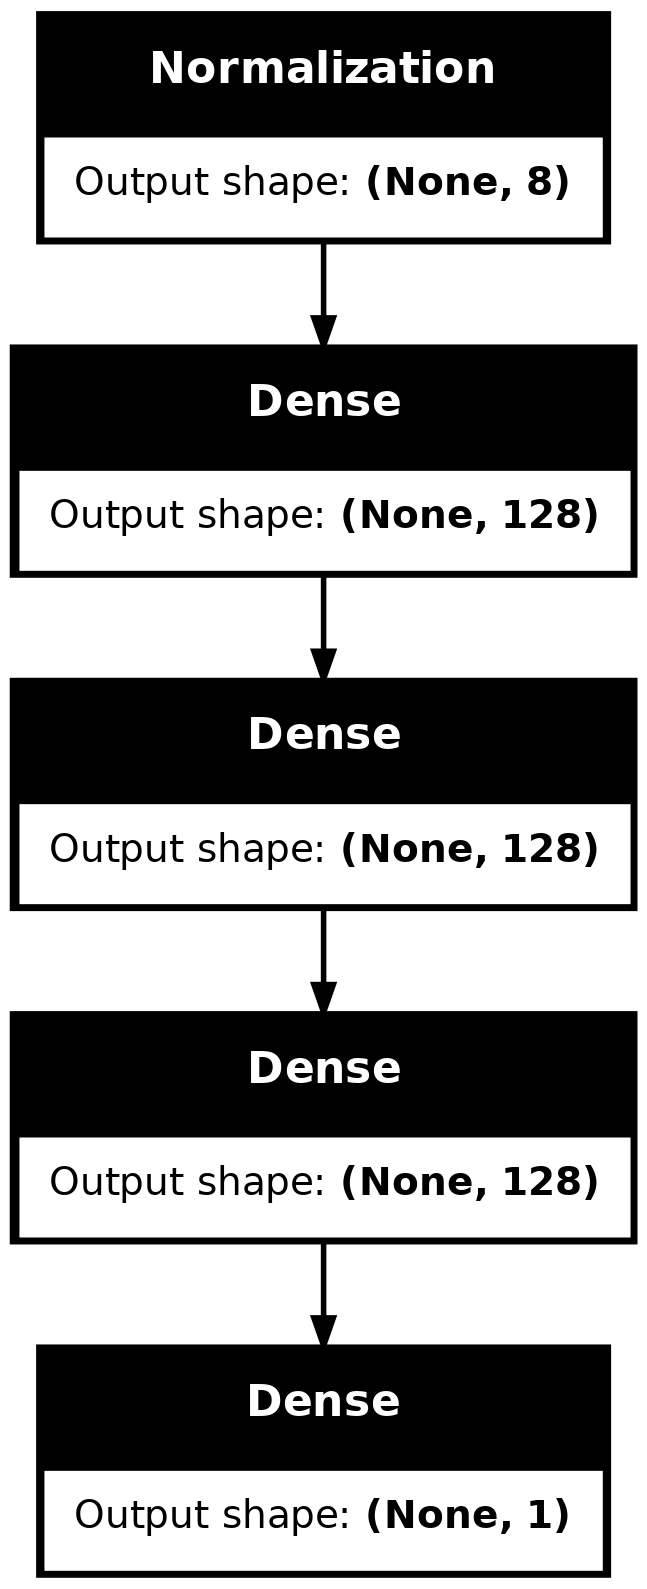

In [94]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

model.compile : this function compile the model for training . Compilation is necessay because it configure the learning process

  Configuring the learning process through model compilation involves setting up various parameters and options that govern how the model is trained. Here's what it entails:

1. **Loss Function**: The choice of a loss function, like Mean Absolute Error or Mean Squared Error, determines how the model's performance is evaluated during training. The loss function measures the difference between the model's predictions and the actual target values.

2. **Optimizer**: An optimizer determines how the model's parameters (weights and biases) are updated during training to minimize the chosen loss function. Optimizers like Stochastic Gradient Descent (SGD), Adam, or RMSprop are commonly used.

3. **Metrics**: Metrics are additional performance measures used to evaluate the model during training and testing. These are different from the loss function and can include accuracy, precision, recall, etc.

4. **Learning Rate**: Some optimizers have a learning rate parameter that determines the step size for updating model parameters. It's crucial to set an appropriate learning rate, as it affects the convergence and stability of the training process.

5. **Regularization**: Regularization techniques like L1 or L2 regularization can be applied to prevent overfitting by penalizing large parameter values.

By configuring these aspects of the learning process, you set the stage for how the model learns from the data. The ultimate goal is to find the model parameters that minimize the chosen loss function while generalizing well to unseen data.
  


In [95]:
model.compile(optimizer=Adam(learning_rate=.001),loss=MeanAbsoluteError(),metrics=[RootMeanSquaredError()])

In [96]:
a=model.fit(train_dataset,validation_data=val_dataset,epochs=150,verbose=1)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 311327.7812 - root_mean_squared_error: 336986.6562 - val_loss: 267738.0938 - val_root_mean_squared_error: 310662.9375
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310516.7500 - root_mean_squared_error: 336165.1250 - val_loss: 285988.8125 - val_root_mean_squared_error: 310585.0312
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312309.6875 - root_mean_squared_error: 337858.4375 - val_loss: 270909.4688 - val_root_mean_squared_error: 310248.2188
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312087.9062 - root_mean_squared_error: 337626.1250 - val_loss: 295191.1562 - val_root_mean_squared_error: 309244.2500
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 309304.9688 - root_mean_squared_error: 334991.5938 - val_loss: 268727.4688 - val_root_mean_squared_error: 306870.0625
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307069.2188 - root_mean_squared_error: 332929.7500 - va

In [97]:
(a.history)

{'loss': [310748.15625,
  310710.59375,
  310512.59375,
  309832.0,
  308065.875,
  304237.40625,
  296963.4375,
  284450.625,
  264519.78125,
  235166.625,
  196021.796875,
  150877.015625,
  108651.5,
  76356.5234375,
  59948.40625,
  51809.6953125,
  46947.80078125,
  43886.90625,
  42126.078125,
  41013.13671875,
  40229.97265625,
  39750.66015625,
  39462.23828125,
  39207.71875,
  38991.57421875,
  38822.7734375,
  38607.01171875,
  38443.9140625,
  38300.36328125,
  38104.90625,
  37995.23046875,
  37858.88671875,
  37727.81640625,
  37606.59375,
  37513.24609375,
  37392.203125,
  37316.35546875,
  37201.8359375,
  37103.41796875,
  36987.39453125,
  36926.93359375,
  36833.2578125,
  36723.46875,
  36639.4296875,
  36555.79296875,
  36519.8046875,
  36460.484375,
  36334.2265625,
  36276.140625,
  36212.74609375,
  36179.671875,
  36055.578125,
  35999.671875,
  35963.7265625,
  35889.11328125,
  35825.48046875,
  35769.2734375,
  35731.1171875,
  35646.234375,
  35582.421875,

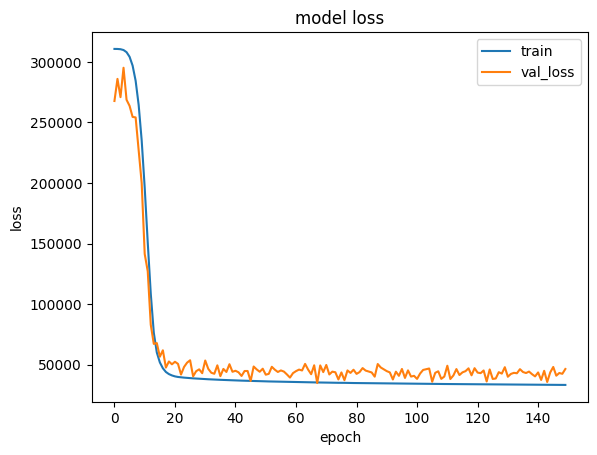

In [98]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val_loss'])

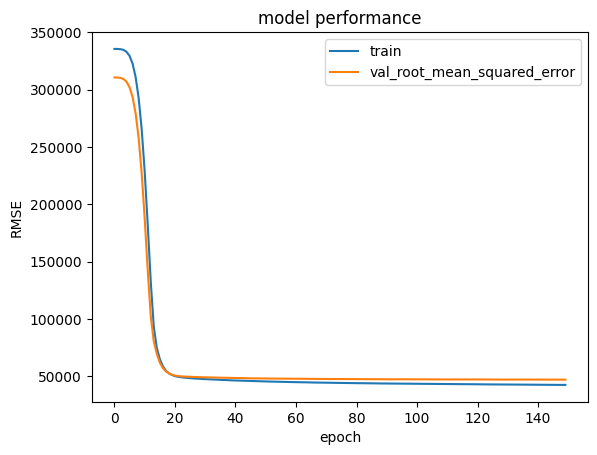

In [99]:
plt.plot(a.history['root_mean_squared_error'])
plt.plot(a.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['train','val_root_mean_squared_error'])


## **Model Evaluation and Testing**

In [100]:
model.evaluate(X_train,Y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32534.8457 - root_mean_squared_error: 41357.1758 


[33120.6328125, 42203.703125]

In [101]:
model.evaluate(X_val,Y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42309.1953 - root_mean_squared_error: 46526.5117 


[48869.375, 46881.29296875]

In [102]:
model.evaluate(X_test,Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36009.2695 - root_mean_squared_error: 44940.6641 


[33209.8515625, 43212.48046875]

In [103]:
X_test.shape

TensorShape([100, 8])

In [104]:

X_test[0].shape

TensorShape([8])

In [105]:
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[440510.16]], dtype=float32)

In [106]:
y_true=list(Y_test[:,0].numpy())

In [107]:

y_pred = list(model.predict(X_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [108]:
y_pred[0]

440510.22

In [109]:
Y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([475984.5], dtype=float32)>

In [110]:
y_pred

[440510.22,
 290916.66,
 272751.8,
 204357.36,
 118137.01,
 449221.8,
 311882.0,
 409107.47,
 384427.84,
 403299.94,
 161525.34,
 237303.67,
 158670.62,
 248650.55,
 430485.72,
 223411.88,
 447794.72,
 353297.72,
 234173.17,
 455858.22,
 240003.77,
 146092.23,
 227817.78,
 324772.72,
 231410.48,
 496807.16,
 315410.66,
 403193.44,
 154680.12,
 293025.5,
 201179.05,
 496080.12,
 183673.66,
 173574.4,
 400665.72,
 207229.53,
 503867.34,
 482105.84,
 475751.47,
 104516.59,
 461620.78,
 178092.27,
 141184.98,
 245313.61,
 367695.7,
 265702.1,
 490194.75,
 395545.03,
 210657.67,
 374779.53,
 277269.78,
 200296.95,
 455637.47,
 440450.5,
 343454.28,
 518280.72,
 201155.64,
 501180.75,
 447167.4,
 445473.47,
 190161.48,
 155361.11,
 169444.22,
 340268.03,
 311700.84,
 518807.72,
 421356.16,
 351430.7,
 450455.84,
 263401.16,
 192741.53,
 414990.53,
 202601.92,
 151249.27,
 248163.31,
 332230.62,
 268467.5,
 304253.28,
 204298.33,
 127706.305,
 200846.81,
 288439.66,
 400898.03,
 213883.67,
 2

In [111]:
Y_test

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[475984.5],
       [422417. ],
       [325176. ],
       [210661.5],
       [122567.5],
       [499647. ],
       [307255. ],
       [443423. ],
       [327075.5],
       [375118. ],
       [153371.5],
       [306660. ],
       [207352.5],
       [242709.5],
       [483708.5],
       [292308.5],
       [490000.5],
       [320391.5],
       [207480.5],
       [490779.5],
       [304216.5],
       [176858. ],
       [184571. ],
       [249765.5],
       [287675. ],
       [423507. ],
       [324260. ],
       [360647.5],
       [134035. ],
       [302423. ],
       [253867. ],
       [456154.5],
       [136079. ],
       [ 80996. ],
       [437043.5],
       [163225. ],
       [507799. ],
       [466398. ],
       [492753. ],
       [ 98489.5],
       [432951.5],
       [224745. ],
       [227669. ],
       [247277.5],
       [352318.5],
       [261732. ],
       [503307.5],
       [425960. ],
       [168854.5],
       [327454.5],


In [112]:
a=(Y_test[0]-y_pred[0])*100
a=a/Y_test[0]

In [113]:
print("ERROR rate of model in first dataset :- ",a)

ERROR rate of model in first dataset :-  tf.Tensor([7.4528227], shape=(1,), dtype=float32)


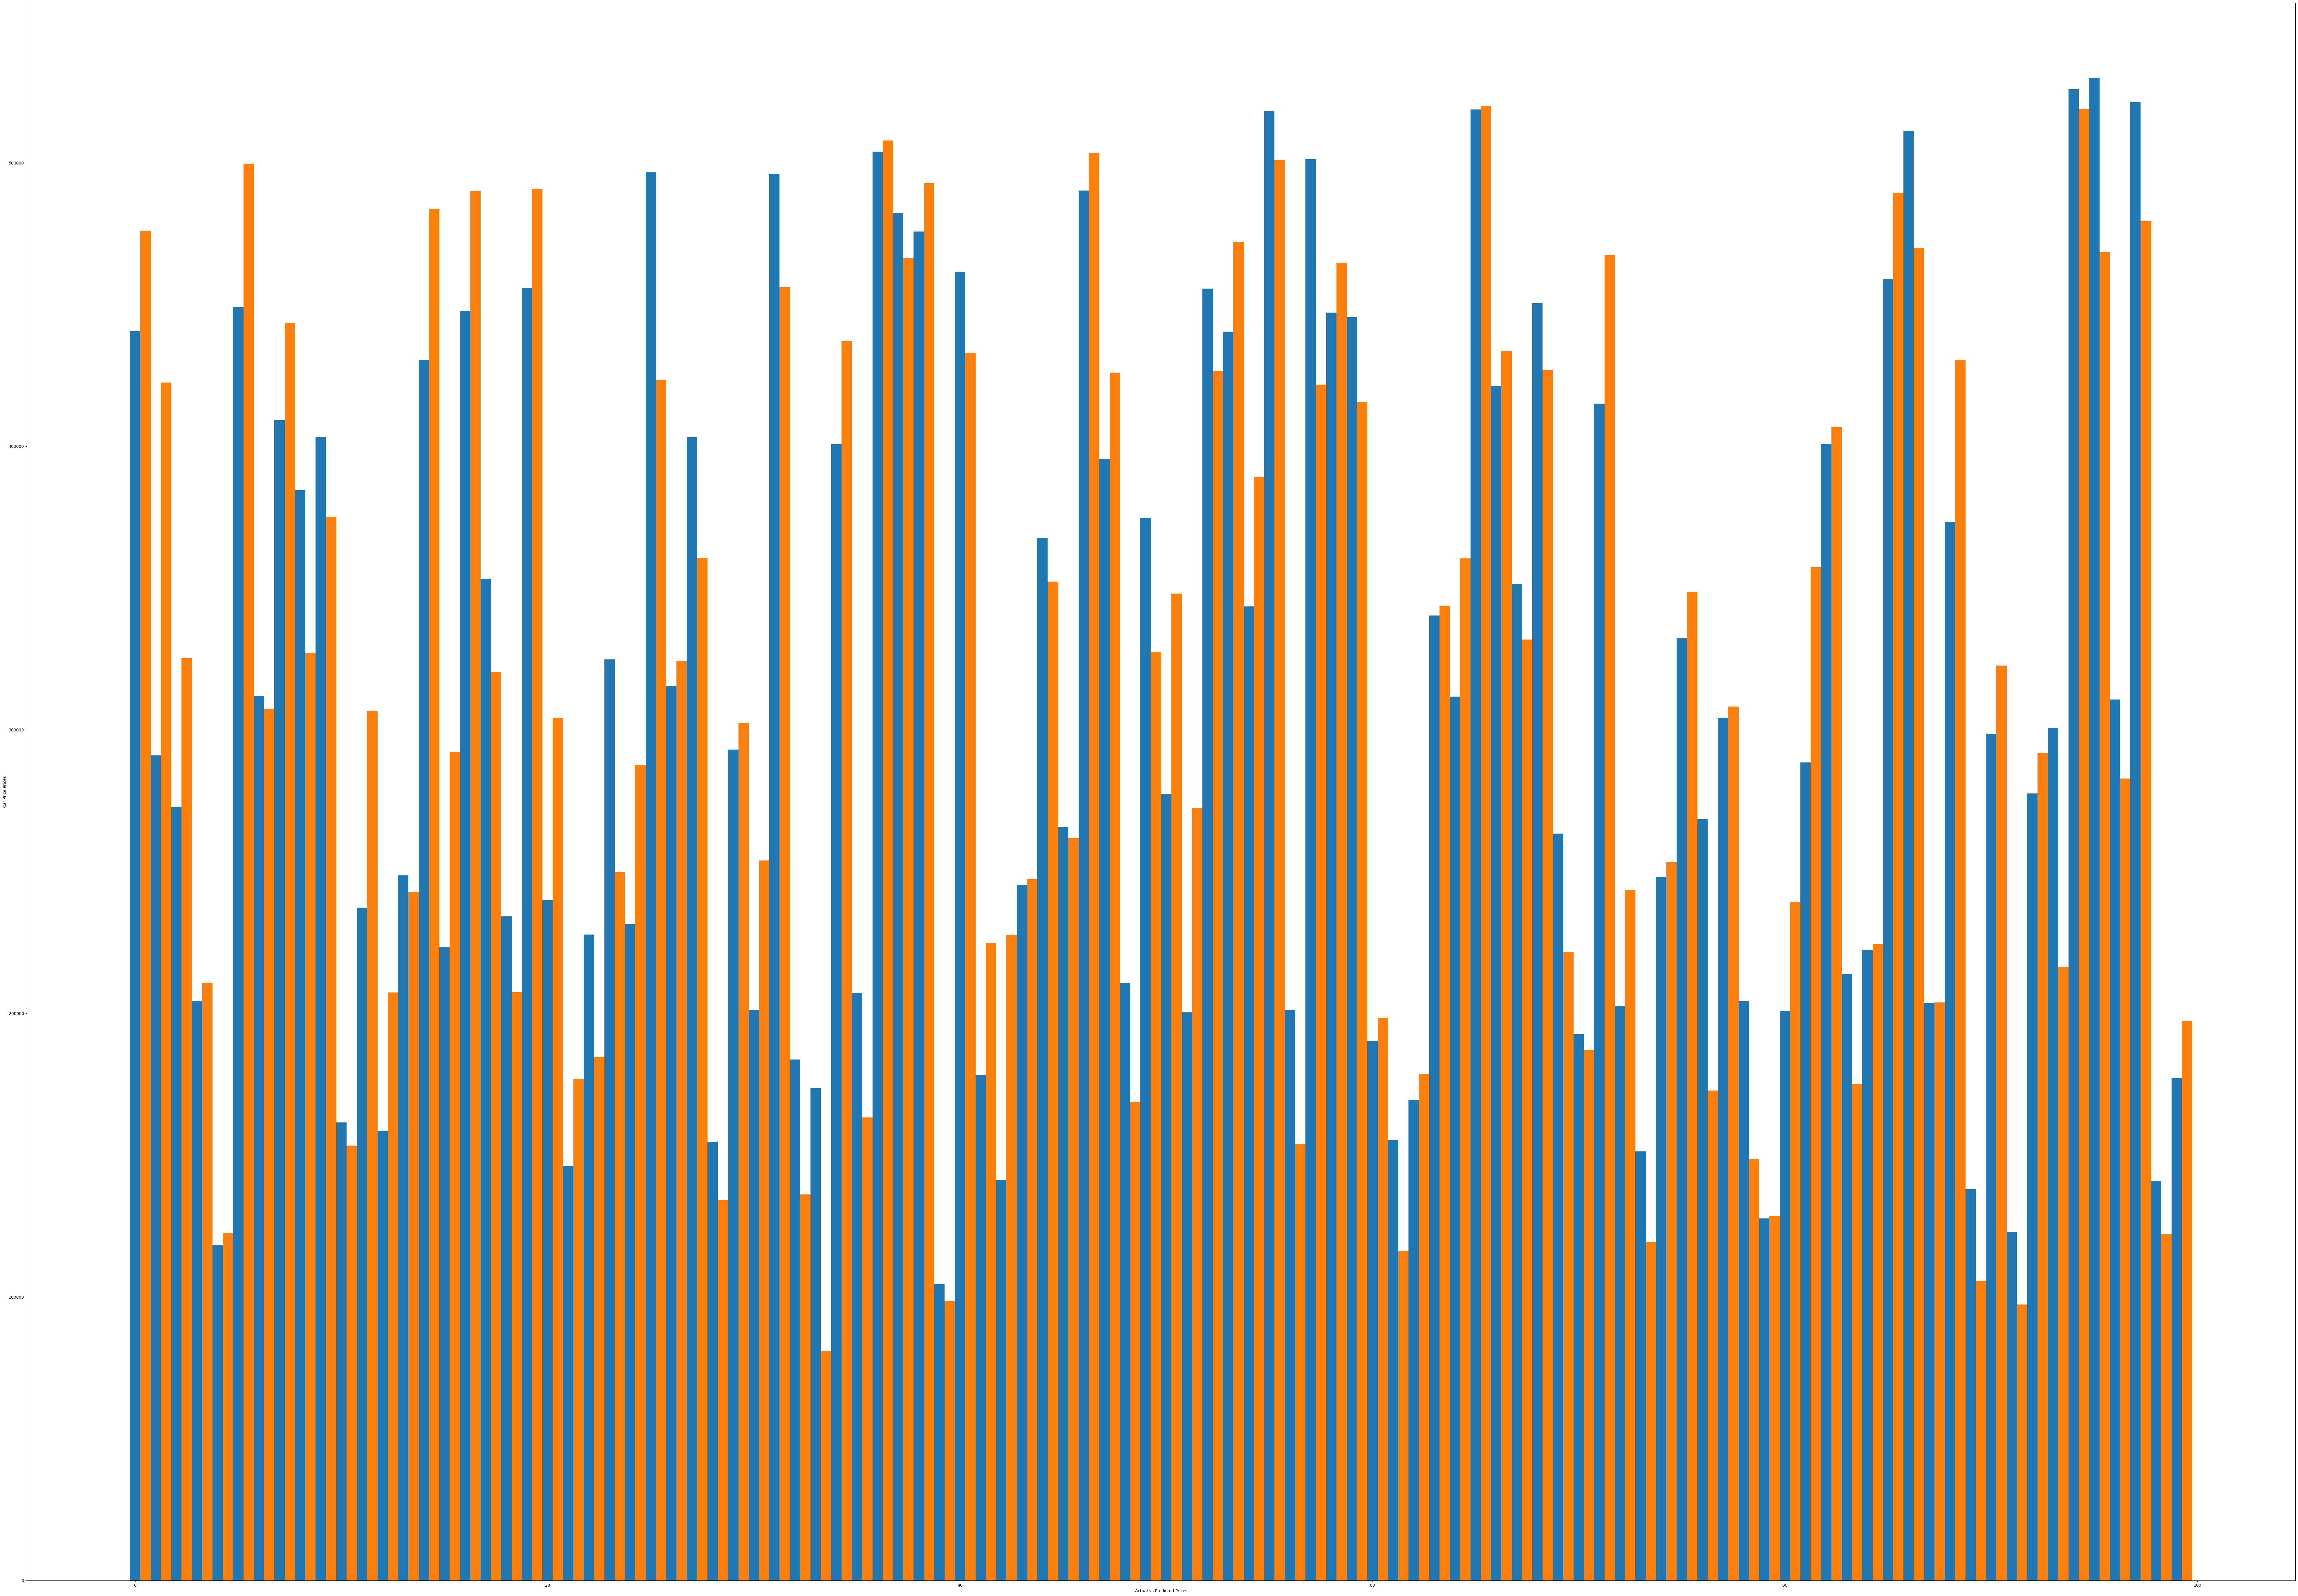

In [114]:

ind = np.arange(100)
plt.figure(figsize=(100,70))

width = 0.5

plt.bar(ind,y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()
# here blue represent the predict value and orange represent actual value 

In [115]:
model.predict(pd.DataFrame([[1,11722,9,9,9,248,100,95]],columns=["years","km","rating","condition","economy","top speed","hp","torque"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[860027.]], dtype=float32)